In [1]:
%load_ext autoreload
%autoreload 2

# Fine-tuned BERT's on MAC results on Sentiment Analysis

In [2]:
import os
import sys

# Get the current working directory
notebook_dir = os.getcwd()

# Change the working directory to the root directory of the project
os.chdir("../")

# move up to the parent directory(project root)
sys.path.append(os.path.abspath(os.path.join(notebook_dir, "..")))

os.getcwd()

'c:\\Users\\mhannani\\Documents\\sentiment_analysis'

In [3]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from src.utils.readers import read_df
from src.utils.parsers import parse_toml
from src.utils.counters import count_nans

from src.utils.visualizers import Visualizer
from src.utils.evaluator import Evaluator

In [4]:
# configration filepath
CONFIG_FILE = Path("configs/config.toml")

# read configuration object
config = parse_toml(CONFIG_FILE)

# useful variables
data_root = Path(config['data']['root'])
exernal_data = config['data']['external']
raw_data = config['data']['raw']
interim_data = config['data']['interim']
processed_data = config['data']['processed']
mac_csv_filename = config['data']['mac_csv_filename']

# output root
mac_output_root = Path(config['output']['root'])
csv_gpt_results_mac_filename = config['output']['mac_tsv_predictions']


# constructing the filepath of the corpus
csv_filepath_raw_data = data_root / raw_data / mac_csv_filename

# constructing the filepath of the results of mac dataset
tsv_gpt_results_mac_filepath = mac_output_root / csv_gpt_results_mac_filename

## Full dataset

In [5]:
df = read_df(tsv_gpt_results_mac_filepath, sep = "\t")

In [6]:
df

,key,tweets,gt_type,pred_type,class_name
0,1,ماهي آرائكم متتبعي الكرام,0,0.0,0.0
1,2,عبقرية المدرب وروعة اللاعبين,1,1.0,0.0
2,3,أمة عربية واحدة خالدة,1,1.0,0.0
3,1,ماهي آرائكم متتبعي الكرام,0,0.0,0.0
4,2,عبقرية المدرب وروعة اللاعبين,1,1.0,0.0
...,...,...,...,...,...
17439,17437,ريالية و افتخر و نعلي راسي الفوق,1,1.0,1.0
17440,17438,ماكاين مشكل,1,-1.0,1.0
17441,17439,سمح ليا ماقصدتش,1,0.0,1.0
17442,17440,الله يكمل عليها بالخير,1,1.0,1.0


In [7]:
gt_type_column_nans_count = count_nans(df, "gt_type")
pred_type_column_nans_count = count_nans(df, "pred_type")
class_name_column_nans_count = count_nans(df, "class_name")

In [8]:
gt_type_column_nans_count, pred_type_column_nans_count, class_name_column_nans_count

(0, 0, 0)

In [9]:
df['gt_type'] = df['gt_type'].astype(float)

In [10]:
df.head()

,key,tweets,gt_type,pred_type,class_name
0,1,ماهي آرائكم متتبعي الكرام,0.0,0.0,0.0
1,2,عبقرية المدرب وروعة اللاعبين,1.0,1.0,0.0
2,3,أمة عربية واحدة خالدة,1.0,1.0,0.0
3,1,ماهي آرائكم متتبعي الكرام,0.0,0.0,0.0
4,2,عبقرية المدرب وروعة اللاعبين,1.0,1.0,0.0


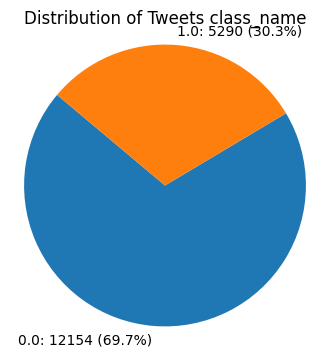

In [11]:
from src.utils.visualizers import visualize_frequencies


visualize_frequencies(df, 'class_name')

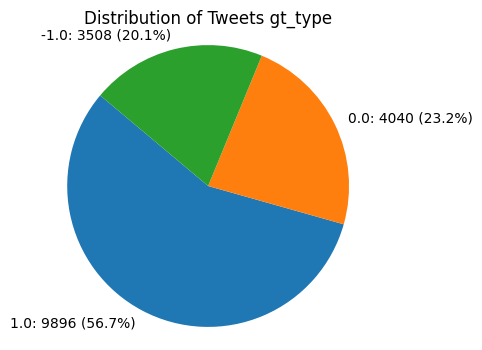

In [12]:
visualize_frequencies(df, 'gt_type')

## Evaluation & Visualization

In [12]:
freezed_backbone_bert_accuracy = {
    "freezed_backbone_bert-base-arabertv2": 0.6875,
    "freezed_backbone_bert-base-arabic": 0.66112385321100925 ,
    "freezed_backbone_bert-base-multilingual-cased": 0.6026376146788991,
    "freezed_backbone_DarijaBERT": 0.6943807339449541,
    "freezed_backbone_darijabert-arabizi": 0.6628440366972477
}

In [13]:
import matplotlib.pyplot as plt
# Extract model names and accuracy values
models = list(freezed_backbone_bert_accuracy.keys())
accuracy_values = list(freezed_backbone_bert_accuracy.values())

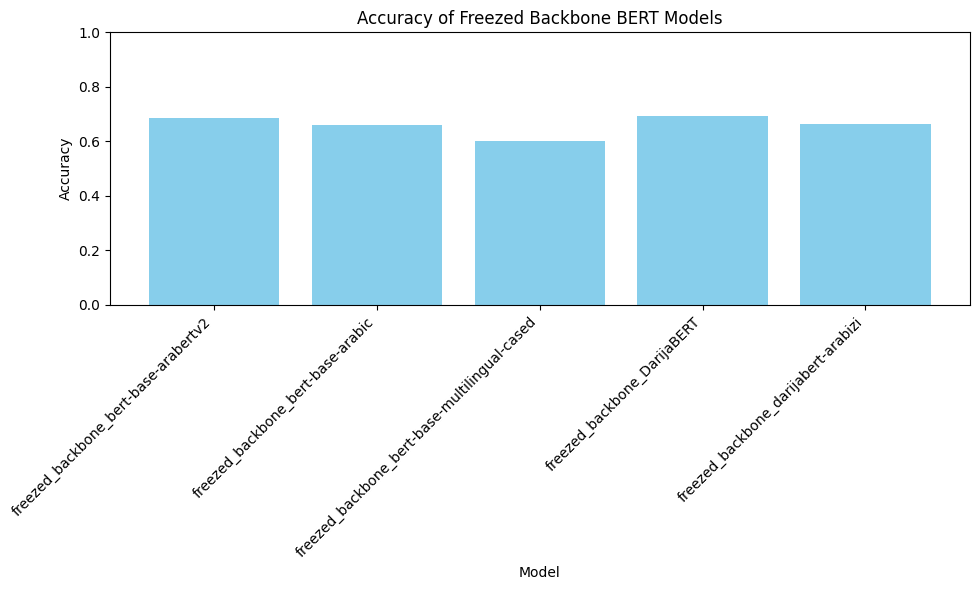

In [14]:
# Plot
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_values, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Freezed Backbone BERT Models')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)  # Set y-axis limit to ensure proper visualization of accuracy values
plt.tight_layout()
plt.show()

In [15]:
fine_tuned_backbone_bert_accuracy = {
    "fine_tuned_bert-base-arabertv2": 0.8962155963302753,
    "fine_tuned_bert-base-arabic": 0.8887614678899083 ,
    "fine_tuned_bert-base-multilingual-cased": 0.8577981651376146,
    "fine_tuned_DarijaBERT": 0.900802752293578,
    "fine_tuned_darijabert-arabizi": 0.8727064220183486
}

In [16]:
import matplotlib.pyplot as plt
# Extract model names and accuracy values
models = list(fine_tuned_backbone_bert_accuracy.keys())
accuracy_values = list(fine_tuned_backbone_bert_accuracy.values())

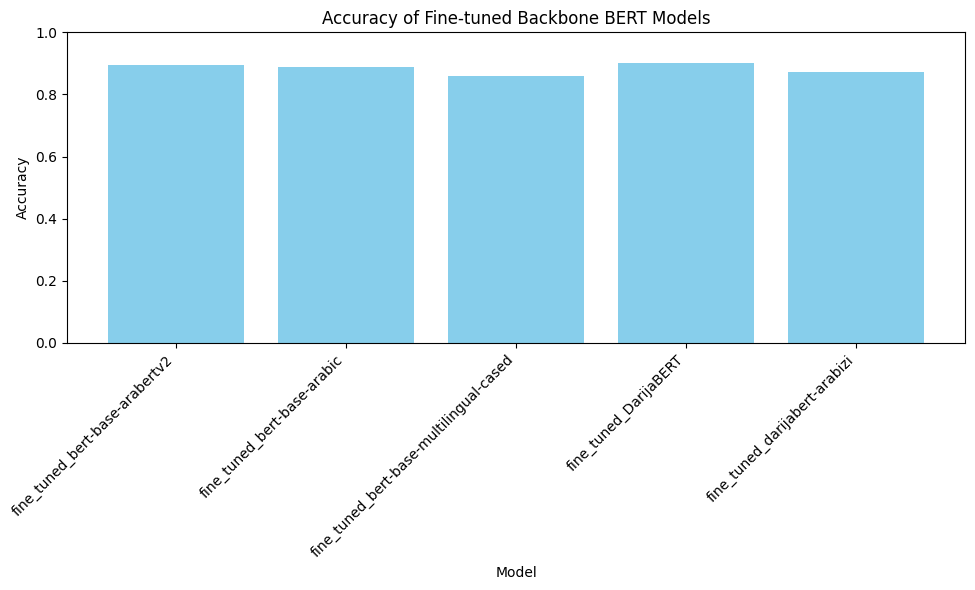

In [17]:
# Plot
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_values, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Fine-tuned Backbone BERT Models')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)  # Set y-axis limit to ensure proper visualization of accuracy values
plt.tight_layout()
plt.show()

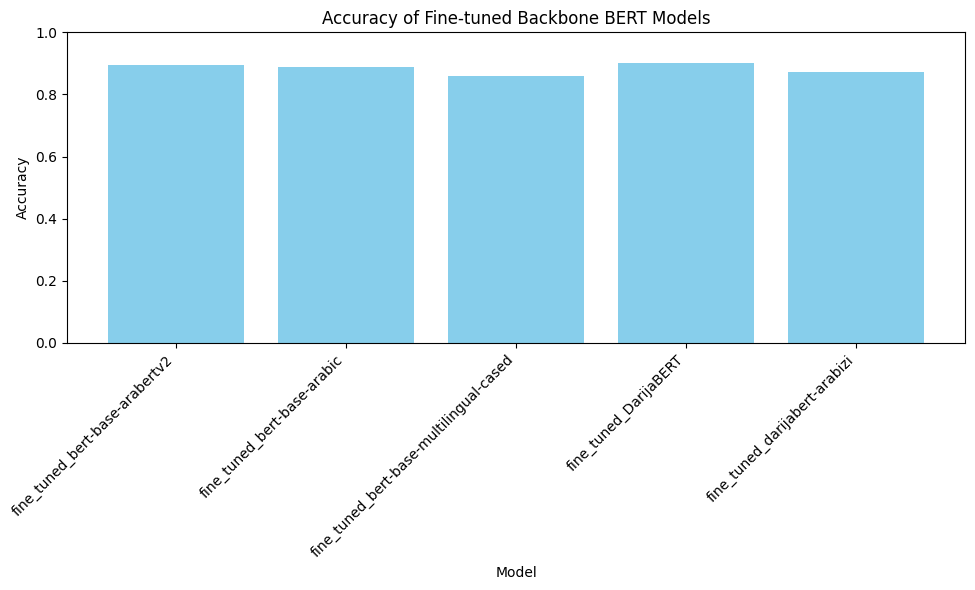

In [ ]:
# Plot
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_values, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Fine-tuned Backbone BERT Models')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)  # Set y-axis limit to ensure proper visualization of accuracy values
plt.tight_layout()
plt.show()